# Analysis of the atomic properties
- Distribution of atomic properties (alchemical potential, atomic energy, atomisation energy after shifting, rescaling to B3LYP values)
- Atomic distributions split up by element
- Comparison of atomic distributions to distribution of atomisation energies of the full molecules 
- Relation between distribution and structural environment

In [ ]:
import numpy as np
import qml
import sys
sys.path.insert(0, '/home/misa/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
import scipy as sc
import itertools as it

from matplotlib import pyplot as plt

# %matplotlib notebook
def normalization_factors(dict_split):
    norm_factors = dict()
    total_length = 0
    for k in dict_split.keys():
        norm_factors[k] = len(dict_split[k][0])
        total_length += len(dict_split[k][0])
        
    for k in norm_factors.keys():
        norm_factors[k] /= total_length
    return(norm_factors)

In [ ]:
plt.rcParams['font.size'] = 20

## Distribution of atomic properties - $\mu, E_I, E_I^{\rm{at}}$

In [ ]:
# labels
data, molecule_size = qmi.load_alchemy_data(qmi.wrapper_alch_data())

atomisation_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomisation')
atomic_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomic')
alch_pot = qmi.generate_label_vector(data, molecule_size.sum(), value='alch_pot')
charges = qmi.generate_label_vector(data, molecule_size.sum(), value='charge')

In [ ]:
kde_atomic_atomisation_all = sc.stats.gaussian_kde(atomisation_en)
x_atomic_atomisation_all = np.linspace(np.amin(atomisation_en)-2.5, np.amax(atomisation_en)+2.5, 500)

kde_atomic_all = sc.stats.gaussian_kde(atomic_en)
x_atomic_all = np.linspace(np.amin(atomic_en)-2.5, np.amax(atomic_en)+10.0, 1000)

kde_alch_all = sc.stats.gaussian_kde(alch_pot)
x_alch_all = np.linspace(np.amin(alch_pot)-0.5, np.amax(alch_pot)+0.5, 500)

In [ ]:
# histograms
alchpot_hist = np.histogram(alch_pot, bins='auto')
atomic_hist = np.histogram(atomic_en, bins=1000)
atomic_atomisation_hist = np.histogram(atomisation_en, bins='fd')

In [ ]:
fig, ax = plt.subplots(1,3)
plt.rcParams['font.size'] = 15
ax[0].plot(x_atomic_atomisation_all, kde_atomic_atomisation_all.evaluate(x_atomic_atomisation_all))
ax[1].plot(x_atomic_all, kde_atomic_all.evaluate(x_atomic_all))
ax[2].plot(x_alch_all, kde_alch_all.evaluate(x_alch_all))

ax[0].set_ylabel('KDE')
ax[0].set_xlabel(r'$E_{I}^{\rm{at}}$ (Ha)')
ax[1].set_xlabel(r'$E_{I}$ (Ha)')
ax[2].set_xlabel(r'$\mu$ (Ha)')

for i in range(3):#it.product(it.product(range(3), range(4))):
    ax[i].set_yticks([],[])

directory = '/home/misa/projects/Atomic-Energies/figures/machine_learning/analysis_atomic_properties/'
# plt.savefig(directory+'kdes_all_elements_atomic_props.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,3)
plt.rcParams['font.size'] = 15
ax[0].plot(alchpot_hist[1][:-1], alchpot_hist[0])
ax[1].plot(atomic_hist[1][:-1], atomic_hist[0])
ax[2].plot(atomic_atomisation_hist[1][:-1], atomic_atomisation_hist[0])

ax[0].set_ylabel('Distribution')
ax[0].set_xlabel(r'$\mu$ (Ha)')
ax[1].set_xlabel(r'$E_{I}$ (Ha)')
ax[2].set_xlabel(r'$E_{I}^{\rm{at}}$ (Ha)')

for i in range(3):#it.product(it.product(range(3), range(4))):
    ax[i].set_yticks([],[])

directory = '/home/misa/projects/Atomic-Energies/figures/machine_learning/analysis_atomic_properties/'
# plt.savefig(directory+'kdes_all_elements_atomic_props.png', bbox_inches='tight')

### Distributions split up by element

In [ ]:
idc_by_charge = qmi.partition_idx_by_charge(charges)
kdes_atomic = {1:0, 6:0, 7:0, 8:0}
kdes_alch_pot = {1:0, 6:0, 7:0, 8:0}
kdes_atomic_atomisation = {1:0, 6:0, 7:0, 8:0}



for k in kdes_atomic.keys():
    kdes_atomic[k] = sc.stats.gaussian_kde(atomic_en[idc_by_charge[k]])
    kdes_alch_pot[k] = sc.stats.gaussian_kde(alch_pot[idc_by_charge[k]])
    kdes_atomic_atomisation[k] = sc.stats.gaussian_kde(atomisation_en[idc_by_charge[k]])

x_alch = {1:0, 6:0, 7:0, 8:0}
x_atomic = {1:0, 6:0, 7:0, 8:0}
x_atomic_atomisation = {1:0, 6:0, 7:0, 8:0}
for k in x_atomic.keys():
    if k == 1:
        x_alch[k] = np.linspace(np.amin(alch_pot[idc_by_charge[k]])-0.5, np.amax(alch_pot[idc_by_charge[k]])+0.5, 500)
        x_atomic[k] = np.linspace(np.amin(atomic_en[idc_by_charge[k]])-0.5, np.amax(atomic_en[idc_by_charge[k]])+0.5, 500)
        x_atomic_atomisation[k] = np.linspace(np.amin(atomisation_en[idc_by_charge[k]])-0.5, np.amax(atomisation_en[idc_by_charge[k]])+1.0, 500)
    else:
        x_atomic[k] = np.linspace(np.amin(atomic_en[idc_by_charge[k]])-2.5, np.amax(atomic_en[idc_by_charge[k]])+2.5, 500)
        x_atomic_atomisation[k] = np.linspace(np.amin(atomisation_en[idc_by_charge[k]])-2.5, np.amax(atomisation_en[idc_by_charge[k]])+2.5, 500)
        x_alch[k] = np.linspace(np.amin(alch_pot[idc_by_charge[k]])-0.5, np.amax(alch_pot[idc_by_charge[k]])+0.5, 500)

In [ ]:
plt.rcParams['figure.figsize'] = [18.0, 10.0]
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(3,4)


# ax[0,0].plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H $\mu$', color='tab:blue' )
ax[0,0].plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H', color='tab:blue' )

ax[0,1].plot(x_alch[6], kdes_alch_pot[6].evaluate(x_alch[6]), label='C', color='tab:orange' )
ax[0,2].plot(x_alch[7], kdes_alch_pot[7].evaluate(x_alch[7]), label='N', color='tab:green' )
ax[0,3].plot(x_alch[8], kdes_alch_pot[8].evaluate(x_alch[8]), label='O', color='tab:red' )

# ax[1,0].plot(x_atomic[1], kdes_atomic[1].evaluate(x_atomic[1]), label=r'H $E_I$', color='tab:blue' )
ax[1,0].plot(x_atomic[1], kdes_atomic[1].evaluate(x_atomic[1]), label=r'H', color='tab:blue' )

ax[1,1].plot(x_atomic[6], kdes_atomic[6].evaluate(x_atomic[6]), label='C', color='tab:orange' )
ax[1,2].plot(x_atomic[7], kdes_atomic[7].evaluate(x_atomic[7]), label='N', color='tab:green' )
ax[1,3].plot(x_atomic[8], kdes_atomic[8].evaluate(x_atomic[8]), label='O', color='tab:red' )


# ax[2,0].plot(x_atomic_atomisation[1], kdes_atomic_atomisation[1].evaluate(x_atomic_atomisation[1]), label=r'H $E_I^{\rm{at}}$', color='tab:blue')
ax[2,0].plot(x_atomic_atomisation[1], kdes_atomic_atomisation[1].evaluate(x_atomic_atomisation[1]), label=r'H', color='tab:blue')

ax[2,1].plot(x_atomic_atomisation[6], kdes_atomic_atomisation[6].evaluate(x_atomic_atomisation[6]), label='C', color='tab:orange')
ax[2,2].plot(x_atomic_atomisation[7], kdes_atomic_atomisation[7].evaluate(x_atomic_atomisation[7]), label='N', color='tab:green')
ax[2,3].plot(x_atomic_atomisation[8], kdes_atomic_atomisation[8].evaluate(x_atomic_atomisation[8]), label='O', color='tab:red')

for i in list(it.product(range(3), range(4))):#it.product(it.product(range(3), range(4))):
    ax[i].set_yticks([],[])
    
for i in it.product(range(3), range(4)):#it.product(it.product(range(3), range(4))):
    ax[i].legend()

## Histograms

In [ ]:
# histograms
bins_alchpot = 100
bin_mode = 500
bins_at_at = 100
# all elements together
hist_alchpot = np.histogram(alch_pot, bins=bins_alchpot, range=(np.amin(alch_pot[idc_by_charge[8]]), np.amax(alch_pot[idc_by_charge[1]])))
hist_atomic = np.histogram(atomic_en, bins=bin_mode)
hist_atomic_atomisation = np.histogram(atomisation_en, bins='auto')

# split by element
hist_alchpot_split = {1:0, 6:0, 7:0, 8:0}
hist_atomic_split = {1:0, 6:0, 7:0, 8:0}
hist_atomic_atomisation_split = {1:0, 6:0, 7:0, 8:0}

for k in hist_atomic_split.keys():
    hist_alchpot_split[k] = np.histogram(alch_pot[idc_by_charge[k]], bins=bins_alchpot, range=(np.amin(alch_pot[idc_by_charge[8]]), np.amax(alch_pot[idc_by_charge[1]])))
    hist_atomic_split[k] = np.histogram(atomic_en[idc_by_charge[k]], bins=bin_mode, range=(np.amin(atomic_en[idc_by_charge[8]]), np.amax(atomic_en[idc_by_charge[1]])))
    hist_atomic_atomisation_split[k] = np.histogram(atomisation_en[idc_by_charge[k]], bins=bins_at_at, range=(np.amin(atomisation_en), np.amax(atomisation_en)) )

#### Only all elements together

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [12,4]
fig, ax = plt.subplots(1,3)

ax[0].plot(hist_alchpot[1][:-1], hist_alchpot[0], color='black')
ax[1].plot(atomic_hist[1][:-1], atomic_hist[0], color='black')
ax[2].plot(hist_atomic_atomisation[1][:-1], hist_atomic_atomisation[0], color='black')

ax[0].set_ylabel('Counts')
ax[0].set_xlabel(r'$E_{I}^{\rm{at}}$ (Ha)')
ax[1].set_xlabel(r'$E_{I}$ (Ha)')
ax[2].set_xlabel(r'$\mu$ (Ha)')

for i in range(3):#it.product(it.product(range(3), range(4))):
    ax[i].set_yticks([],[])

directory = '/home/misa/projects/Atomic-Energies/figures/machine_learning/analysis_atomic_properties/'
# plt.savefig(directory+'kdes_all_elements_atomic_props.png', bbox_inches='tight')
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_property_distributions_no_splitting.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [3,4]
fig, ax = plt.subplots(1,1)

ax.plot(hist_alchpot[1][:-1], hist_alchpot[0], color='black')

ax.set_ylabel('Counts')
ax.set_xlabel(r'$\mu$ (Ha)')

for i in range(3):#it.product(it.product(range(3), range(4))):
    ax.set_yticks([],[])

# plt.savefig(directory+'kdes_all_elements_atomic_props.png', bbox_inches='tight')
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/alchpot_distributions_no_splitting.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [3,4]
fig, ax = plt.subplots(2,1, sharex=True)

fig.subplots_adjust(hspace=0.1)

ax[0].plot(hist_atomic[1][:-1], hist_atomic[0], color='black')

ax[1].plot(hist_atomic[1][:-1], hist_atomic[0], color='black')


ax[0].set_ylim((1200, np.amax(hist_atomic_split[1][0]*1.2)*1.1))
ax[1].set_ylim((0, 150))
# hide the spines between ax and ax2
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].xaxis.tick_top()
ax[0].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1].xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax[0].set_yticks([])
ax[1].set_yticks([])

# formatting
ax[1].set_xlim((-65,-4))
    
#ax[1].set_ylabel('Counts', ha='left')

ax[1].set_xlabel(r'$E_{I}$ (Ha)')
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_en_distributions_no_splitting.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [3,4]
fig, ax = plt.subplots(1,1)

ax.plot(hist_atomic_atomisation[1][:-1]*627.5, hist_atomic_atomisation[0], color='black')

ax.set_ylabel('Counts')
ax.set_xlabel(r'$E^{\rm at}_I$ (Ha)')

for i in range(3):#it.product(it.product(range(3), range(4))):
    ax.set_yticks([],[])

# plt.savefig(directory+'kdes_all_elements_atomic_props.png', bbox_inches='tight')
#plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_atomisation_distributions_no_splitting.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [12,4]
fig, ax = plt.subplots(1,3)

ax[0].plot(hist_alchpot_split[1][1][:-1], hist_alchpot_split[1][0], label=r'H', color='tab:blue' )
ax[0].plot(hist_alchpot_split[6][1][:-1], hist_alchpot_split[6][0], label=r'C', color='tab:orange' )
ax[0].plot(hist_alchpot_split[7][1][:-1], hist_alchpot_split[7][0], label=r'N', color='tab:green' )
ax[0].plot(hist_alchpot_split[8][1][:-1], hist_alchpot_split[8][0], label=r'N', color='tab:red' )
ax[0].plot(hist_alchpot[1][:-1], hist_alchpot[0], '--', color='black')
# formatting
ax[0].set_xticks(np.arange(-8, -4, 1))

ax[1].plot(hist_atomic_split[1][1][:-1], hist_atomic_split[1][0]*1.2, label=r'H', color='tab:blue' )
ax[1].plot(hist_atomic_split[6][1][:-1], hist_atomic_split[6][0], label=r'C', color='tab:orange' )
ax[1].plot(hist_atomic_split[7][1][:-1], hist_atomic_split[7][0], label=r'N', color='tab:green' )
ax[1].plot(hist_atomic_split[8][1][:-1], hist_atomic_split[8][0], label=r'N', color='tab:red' )
ax[1].plot(hist_atomic[1][:-1], hist_atomic[0], '--', color='black')
# formatting
#ax[1].set_xticks(np.arange(-8, -4, 1))
ax[1].set_xlim((-70,0))

ax[2].plot(hist_atomic_atomisation_split[1][1][:-1], hist_atomic_atomisation_split[1][0], label=r'H', color='tab:blue' )
ax[2].plot(hist_atomic_atomisation_split[6][1][:-1], hist_atomic_atomisation_split[6][0], label=r'C', color='tab:orange' )
ax[2].plot(hist_atomic_atomisation_split[7][1][:-1], hist_atomic_atomisation_split[7][0], label=r'N', color='tab:green' )
ax[2].plot(hist_atomic_atomisation_split[8][1][:-1], hist_atomic_atomisation_split[8][0], label=r'N', color='tab:red' )
ax[2].plot(hist_atomic_atomisation[1][:-1], hist_atomic_atomisation[0], '--', color='black')

for i in range(3):
    ax[i].set_yticklabels([])
    
ax[0].set_ylabel('Counts')
ax[0].set_xlabel(r'$\mu$ (Ha)')
ax[1].set_xlabel(r'$E_{I}$ (Ha)')
ax[2].set_xlabel(r'$E_{I}^{\rm{at}}$ (Ha)')
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_property_distributions.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [4,4]
fig, ax = plt.subplots(2,1, sharex=True)

fig.subplots_adjust(hspace=0.1)

ax[0].plot(hist_atomic_split[1][1][:-1], hist_atomic_split[1][0]*1.2, label=r'H', color='tab:blue' )
ax[0].plot(hist_atomic[1][:-1], hist_atomic[0], '--', color='black')


ax[1].plot(hist_atomic_split[1][1][:-1], hist_atomic_split[1][0]*1.2, label=r'H', color='tab:blue' )
ax[1].plot(hist_atomic_split[6][1][:-1], hist_atomic_split[6][0], label=r'C', color='tab:orange' )
ax[1].plot(hist_atomic_split[7][1][:-1], hist_atomic_split[7][0], label=r'N', color='tab:green' )
ax[1].plot(hist_atomic_split[8][1][:-1], hist_atomic_split[8][0], label=r'N', color='tab:red' )
ax[1].plot(hist_atomic[1][:-1], hist_atomic[0], '--', color='black')


ax[0].set_ylim((1200, np.amax(hist_atomic_split[1][0]*1.2)*1.1))
ax[1].set_ylim((0, 150))
# hide the spines between ax and ax2
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].xaxis.tick_top()
ax[0].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1].xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax[0].set_yticks([])
ax[1].set_yticks([])

# formatting
ax[1].set_xlim((-65,-4))
    
#ax[1].set_ylabel('Counts', ha='left')

ax[1].set_xlabel(r'$E_{I}$ (Ha)')
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_energy_distribution.png', bbox_inches='tight')

### Histogram atomic atomisation energy split up

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [4,4]
fig, ax = plt.subplots(2,1, sharex=True)

fig.subplots_adjust(hspace=0.1)

ax[0].plot(hist_atomic_atomisation_split[1][1][:-1], hist_atomic_atomisation_split[1][0]*1.2, label=r'H', color='tab:blue' )
ax[0].plot(hist_atomic_atomisation[1][:-1], hist_atomic_atomisation[0], '--', color='black')


ax[1].plot(hist_atomic_atomisation_split[1][1][:-1], hist_atomic_atomisation_split[1][0]*1.2, label=r'H', color='tab:blue' )
ax[1].plot(hist_atomic_atomisation_split[6][1][:-1], hist_atomic_atomisation_split[6][0], label=r'C', color='tab:orange' )
ax[1].plot(hist_atomic_atomisation_split[7][1][:-1], hist_atomic_atomisation_split[7][0], label=r'N', color='tab:green' )
ax[1].plot(hist_atomic_atomisation_split[8][1][:-1], hist_atomic_atomisation_split[8][0], label=r'N', color='tab:red' )
ax[1].plot(hist_atomic_atomisation[1][:-1], hist_atomic_atomisation[0], '--', color='black')


ax[0].set_ylim((1200, np.amax(hist_atomic_atomisation_split[1][0]*1.2)*1.1))
ax[1].set_ylim((0, 150))
# hide the spines between ax and ax2
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].xaxis.tick_top()
ax[0].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1].xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax[0].set_yticks([])
ax[1].set_yticks([])

# formatting
#ax[1].set_xlim((-65,-4))
    
#ax[1].set_ylabel('Counts', ha='left')

ax[1].set_xlabel(r'$E_{I}$ (Ha)')
#plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_energy_distribution.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [6,4]
fig, ax = plt.subplots(1,1)




ax.plot(hist_atomic_atomisation_split[1][1][:-1]*627.5, hist_atomic_atomisation_split[1][0], label=r'H', color='tab:blue' )
ax.plot(hist_atomic_atomisation_split[6][1][:-1]*627.5, hist_atomic_atomisation_split[6][0], label=r'C', color='tab:orange' )
ax.plot(hist_atomic_atomisation_split[7][1][:-1]*627.5, hist_atomic_atomisation_split[7][0], label=r'N', color='tab:green' )
ax.plot(hist_atomic_atomisation_split[8][1][:-1]*627.5, hist_atomic_atomisation_split[8][0], label=r'O', color='tab:red' )
ax.plot(hist_atomic_atomisation[1][:-1]*627.5, hist_atomic_atomisation[0], '--', color='black')
ax.legend()
ax.set_xlabel(r'$E_{I}$ (kcal/mol)')
ax.set_yticks([])
ax.set_ylabel('Counts')
#plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_atomisation_energy_distribution.png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sc = ax.scatter([1, 2], [1, 2], c=[1, 2])
ax.set_ylabel('YLabel', loc='top')
ax.set_xlabel('XLabel', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("ZLabel", ma='left')

plt.show()


In [ ]:
percentage_el = dict()
total_length = molecule_size.sum()
for k in idc_by_charge.keys():
    percentage_el[k] = len(idc_by_charge[k][0])/total_length
percentage_el

In [ ]:
np.trapz(kdes_atomic_atomisation[1].evaluate(x_atomic_atomisation[1])*percentage_el[1], x_atomic_atomisation[1])

In [ ]:
fig, ax = plt.subplots(1,3)
plt.rcParams['font.size'] = 15

# alchemical potential
ax[0].plot(x_alch_all, kde_alch_all.evaluate(x_alch_all), color='black')
ax[0].plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1])*percentage_el[1], label=r'H', color='tab:blue' )
ax[0].plot(x_alch[6], kdes_alch_pot[6].evaluate(x_alch[6])*percentage_el[6], label='C', color='tab:orange' )
ax[0].plot(x_alch[7], kdes_alch_pot[7].evaluate(x_alch[7])*percentage_el[7], label='N', color='tab:green' )
ax[0].plot(x_alch[8], kdes_alch_pot[8].evaluate(x_alch[8])*percentage_el[8], label='O', color='tab:red' )

# atomic energy
ax[1].plot(x_atomic_all, kde_atomic_all.evaluate(x_atomic_all), color='black')
ax[1].plot(x_atomic[1], kdes_atomic[1].evaluate(x_atomic[1])*percentage_el[1], label=r'H', color='tab:blue' )
ax[1].plot(x_atomic[6], kdes_atomic[6].evaluate(x_atomic[6])*percentage_el[6], label='C', color='tab:orange' )
ax[1].plot(x_atomic[7], kdes_atomic[7].evaluate(x_atomic[7])*percentage_el[7], label='N', color='tab:green' )
ax[1].plot(x_atomic[8], kdes_atomic[8].evaluate(x_atomic[8])*percentage_el[8], label='O', color='tab:red' )

# atomic atomisation
ax[2].plot(x_atomic_atomisation_all, kde_atomic_atomisation_all.evaluate(x_atomic_atomisation_all), color='black')
ax[2].plot(x_atomic_atomisation[1], kdes_atomic_atomisation[1].evaluate(x_atomic_atomisation[1])*percentage_el[1], label=r'H', color='tab:blue')
ax[2].plot(x_atomic_atomisation[6], kdes_atomic_atomisation[6].evaluate(x_atomic_atomisation[6])*percentage_el[6], label='C', color='tab:orange')
ax[2].plot(x_atomic_atomisation[7], kdes_atomic_atomisation[7].evaluate(x_atomic_atomisation[7])*percentage_el[7], label='N', color='tab:green')
ax[2].plot(x_atomic_atomisation[8], kdes_atomic_atomisation[8].evaluate(x_atomic_atomisation[8])*percentage_el[8], label='O', color='tab:red')


#### Alchemical potentials split up by element

In [ ]:
fig, ax = plt.subplots(1,1)
norms = normalization_factors(idc_by_charge)
plt.rcParams['font.size'] = 20

ax.plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1])*norms[1.0], label=r'$\mu_{\rm{H}}$', color='tab:blue' )
ax.plot(x_alch[6], kdes_alch_pot[6].evaluate(x_alch[6])*norms[6.0], label=r'$\mu_{\rm{C}}$', color='tab:orange' )
ax.plot(x_alch[7], kdes_alch_pot[7].evaluate(x_alch[7])*norms[7.0], label=r'$\mu_{\rm{N}}$', color='tab:green' )
ax.plot(x_alch[8], kdes_alch_pot[8].evaluate(x_alch[8])*norms[8.0], label=r'$\mu_{\rm{O}}$', color='tab:red' )
# ax.plot(x_alch_all, 2.5*kde_alch_all.evaluate(x_alch_all), "--")

ax.set_xlabel(r'$\mu$ (Ha)')
ax.set_ylabel('KDE')
ax.legend()
directory = '/home/misa/projects/Atomic-Energies/figures/machine_learning/analysis_atomic_properties/'
# plt.savefig(directory+'kdes_alchpots_split_up.png', bbox_inches='tight')

split- spread of alchemical potentials similiar to atomisation energy of molecule
- a lot of structure in distribution -> exploration (functional groups...)
- would a representation that has a similar distribution for the distances perform better?


- atomic energies -> rescaling, wide range of energies harder to learn?


- shift to B3LYP leads to change of distribution
- double, triple bonds $\rightarrow$ less hydrogens, energy is partitioned among less atoms 

$\rightarrow$ absolute of atomic energy per atom is higher after shifting to B3LYP values

$\rightarrow$ atomic atomisation energy profile is different than atomic energy profile

#### Structure of alchemical potential distribution

In [ ]:
def get_type_closest_neighbour(coords, charges):
    distances = sc.spatial.distance.cdist(coords, coords)
    charge_closest_neighbour = []
    for i in range(len(distances)):
        min_dist = np.amin(distances[i][np.where(distances[i] > 1e-5)])
        charge_closest_neighbour.append(charges[np.where(distances[i]==min_dist)][0])
    return(charge_closest_neighbour)

In [ ]:
charge_closest_neighbour = []
for mol in data:
    charge_closest_neighbour.extend(get_type_closest_neighbour(mol[:,1:4], mol[:,0]))
charge_closest_neighbour = np.array(charge_closest_neighbour)

alchpot_sorted_by_neighbour = dict()
for k in idc_by_charge.keys():
    alchpot_sorted_by_neighbour[k] = {1.0:[], 6.0:[], 7.0:[], 8.0:[]}
    for el, alch in zip(charge_closest_neighbour[idc_by_charge[k]], alch_pot[idc_by_charge[k]]):
        alchpot_sorted_by_neighbour[k][el].append(alch)

In [ ]:
# ax[0,0].plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H $\mu$', color='tab:blue' )

kdes = dict()

for k in alchpot_sorted_by_neighbour[1.0].keys():
    if len(alchpot_sorted_by_neighbour[1.0][k]) != 0:
        kdes[k] = sc.stats.gaussian_kde(alchpot_sorted_by_neighbour[1.0][k])

x_kdes = dict()
for k in kdes.keys():
    if len(alchpot_sorted_by_neighbour[1.0][k]) != 0:
        x_kdes[k] = np.linspace(np.amin(alchpot_sorted_by_neighbour[1.0][k])-0.5, np.amax(alchpot_sorted_by_neighbour[1.0][k])+0.5, 500)
        


In [ ]:
kdes = dict()

k1 = 7.0

for k in alchpot_sorted_by_neighbour[k1].keys():
    if len(alchpot_sorted_by_neighbour[k1][k]) != 0:
        kdes[k] = sc.stats.gaussian_kde(alchpot_sorted_by_neighbour[k1][k])

x_kdes = dict()
for k in kdes.keys():
    if len(alchpot_sorted_by_neighbour[k1][k]) != 0:
        x_kdes[k] = np.linspace(np.amin(alchpot_sorted_by_neighbour[k1][k])-0.5, np.amax(alchpot_sorted_by_neighbour[k1][k])+0.5, 500)
        

In [ ]:
fig, ax = plt.subplots(1,1)
for k in kdes.keys():

    ax.plot(x_kdes[k], kdes[k].evaluate(x_kdes[k]), label=f'Z={k}')
# ax.plot(x_alch[1], kdes_alch_pot[1].evaluate(x_alch[1]), label=r'H $\mu$')
ax.legend()

# Atomisation Energy distribution of molecules

In [ ]:
molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
kde_molecule = sc.stats.gaussian_kde(molecule_atomisation)
x_molecule = np.linspace(np.amin(molecule_atomisation)-1, np.amax(molecule_atomisation)+1, 500)
fig, ax = plt.subplots(1,1)
ax.plot(x_molecule, kde_molecule.evaluate(x_molecule))
ax.set_xlim(-3.5, -0.5)
ax.set_xlabel('Atomisation Energy per molecule (Ha)')
ax.set_ylabel('KDE')
# plt.savefig('/home/misa/projects/Atomic-Energies/figures/machine_learning/analysis_atomic_properties/kde_atomisation_energy_molecules.png', bbox_inches='tight')

In [ ]:
len(molecule_atomisation)

In [ ]:
molecule_hist = np.histogram(molecule_atomisation, bins=10)

plt.rcParams['figure.figsize'] = [3,4]
fig, ax = plt.subplots(1,1)
ax.plot(molecule_hist[1][:-1]*627.5, molecule_hist[0])

#ax.set_xlim(-3.0, -1.3)
ax.set_xlabel(r'$E^{\rm at, mol}$ (Ha)')
#ax.set_ylabel('Counts')
ax.set_yticks([])
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomisation_molecule_hist.png', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [6,4]
fig, ax = plt.subplots(1,1)




# ax.plot(hist_atomic_atomisation_split[1][1][:-1]*627.5, hist_atomic_atomisation_split[1][0], label=r'H', color='tab:blue' )
# ax.plot(hist_atomic_atomisation_split[6][1][:-1]*627.5, hist_atomic_atomisation_split[6][0], label=r'C', color='tab:orange' )
# ax.plot(hist_atomic_atomisation_split[7][1][:-1]*627.5, hist_atomic_atomisation_split[7][0], label=r'N', color='tab:green' )
# ax.plot(hist_atomic_atomisation_split[8][1][:-1]*627.5, hist_atomic_atomisation_split[8][0], label=r'O', color='tab:red' )
ax.plot(molecule_hist[1][:-1]*627.5, molecule_hist[0]/np.amax(molecule_hist[0]), color='grey', label = r'$E^{\rm mol}$')
ax.plot(hist_atomic_atomisation[1][:-1]*627.5, hist_atomic_atomisation[0]/np.amax(hist_atomic_atomisation[0]), '-', color='black', label = r'$E_I$')
ax.legend()
ax.set_xlabel(r'$E_{I}$ (kcal/mol)')
ax.set_yticks([])
ax.set_ylabel('Counts')
plt.savefig('/home/misa/projects/phd_symposium_2021/figures/atomic_atomisation_energy_distribution_comparison.png', bbox_inches='tight')

In [ ]:
molecule_hist[0]/np.amax(molecule_hist[0])

In [ ]:
molecule_hist[1][:-1]*627.5

### Atomic energy distribution H vs atomisation energy distribution

In [ ]:
molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
kde_molecule = sc.stats.gaussian_kde(molecule_atomisation)
x_molecule = np.linspace(np.amin(molecule_atomisation)-1, np.amax(molecule_atomisation)+1, 500)

In [ ]:
mean_atomic_h = qmi.get_average_property(idc_by_charge[1][0], data, molecule_size, 'atomic')[1]
mean_atomisation_mol = molecule_atomisation.mean()

In [ ]:
x_molecule_shifted = (x_molecule - mean_atomisation_mol)
kde_molecule_shifted = sc.stats.gaussian_kde(molecule_atomisation - mean_atomisation_mol)
x_h_shifted = (x_atomic[1] - mean_atomic_h)
kde_h_shifted = sc.stats.gaussian_kde(atomic_en[idc_by_charge[1]] - mean_atomic_h)

In [ ]:
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [10.0, 5.0]
fig, ax = plt.subplots(1,1)
plt.rcParams['font.size'] = 15
ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), label = r'$E_{\rm{at}}^{\rm{mol}}$', color='black')
ax.plot(x_h_shifted, kde_h_shifted.evaluate(x_h_shifted), label=r'$E_{\rm{H}}$')
ax.set_xlim(-1.5, 1.5)
ax.set_xlabel(r'$E$ (Ha)')
ax.set_ylabel('KDE')
ax.legend()

the distributions are similar, can we get similar learning curves?

#### comparison including QM7

In [ ]:
# labels
p_labels = '/home/misa/datasets/qm7/values.csv'
atomisation_energies_unsorted_qm7 = np.loadtxt(p_labels, skiprows=1, delimiter=',', usecols=(0,81))
atomisation_energies_sorted_qm7 = atomisation_energies_unsorted_qm7[atomisation_energies_unsorted_qm7[:,0].argsort()].copy()
labels_qm7 = atomisation_energies_sorted_qm7[:,1].copy()/630
kde_molecule_qm7 = sc.stats.gaussian_kde(labels_qm7)

ae_shifted_scaled_qm7 = (atomisation_energies_sorted_qm7[:,1]-atomisation_energies_sorted_qm7[:,1].mean())*0.0016
kde_molecule_shifted_qm7 = sc.stats.gaussian_kde(ae_shifted_scaled_qm7)
x_molecule_qm7 = np.linspace(np.amin(ae_shifted_scaled_qm7)-1, np.amax(ae_shifted_scaled_qm7)+1, 500)

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams["font.size"] = 20
ax.plot(x_h_shifted, kde_h_shifted.evaluate(x_h_shifted), label=r'$\mu_{\rm{H}}$')
ax.plot(x_molecule_qm7, kde_molecule_shifted_qm7.evaluate(x_molecule_qm7), label = r'$E_{\rm{mol}}^{\rm{at, QM7}}$', color='black')
ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), '--', label = r'$E_{\rm{mol}}^{\rm{at, s-QM9}}$', color='black')
ax.set_xlim(-1.5, 1.5)
ax.set_xlabel(r'$E^{\rm{at}}$ (Ha)')
ax.set_ylabel('KDE')
ax.legend()
directory = '/home/misa/projects/Atomic-Energies/figures/machine_learning/analysis_atomic_properties/'
plt.savefig(directory+'kde_qm7_qm9_muH.png', bbox_inches = 'tight')

# Correlation between metric and energy difference

In [1]:
import numpy as np
import qml
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
from matplotlib import pyplot as plt

In [2]:
def get_element_symbol(Z):
    if int(Z) == 1:
        return('H')
    elif int(Z) == 6:
        return('C')
    elif int(Z) == 7:
        return('N')
    elif int(Z) == 8:
        return('O')
    else:
        raise ValueError('Symbol for given charge not available')
        
# make distance matrix
def get_dmatrix(reps):
    num_reps = len(reps)
    dmatrix = np.zeros((num_reps, num_reps))
    for rows in range(num_reps):
        for cols in range(rows, num_reps):
            dmatrix[rows, cols] = np.linalg.norm(reps[rows]-reps[cols])
            dmatrix[cols, rows] = dmatrix[rows, cols]
    return(dmatrix)

# make distance matrix
def get_property_matrix(labels):
    num_labels = len(labels)
    prop_matrix = np.zeros((num_labels, num_labels))
    for rows in range(num_labels):
        for cols in range(rows, num_labels):
            prop_matrix[rows, cols] = np.abs(labels[rows]-labels[cols])
            prop_matrix[cols, rows] = prop_matrix[rows, cols]
    return(prop_matrix)

def get_all_matrices(reps, alchpot, atomic, atomisation):
    num_reps = len(reps)
    dmatrix = np.zeros((num_reps, num_reps))
    alchpot_matrix = np.zeros((num_reps, num_reps))
    atomic_matrix = np.zeros((num_reps, num_reps))
    atomisation_matrix = np.zeros((num_reps, num_reps))
    for rows in range(num_reps):
        for cols in range(rows, num_reps):
            dmatrix[rows, cols] = np.linalg.norm(reps[rows]-reps[cols])
            #dmatrix[cols, rows] = dmatrix[rows, cols]
            alchpot_matrix[rows, cols] = np.abs(alchpot[rows]-alchpot[cols])
            atomic_matrix[rows, cols] = np.abs(atomic[rows]-atomic[cols])
            atomisation_matrix[rows, cols] = np.abs(atomisation[rows]-atomisation[cols])
    return(dmatrix, alchpot_matrix, atomic_matrix,atomisation_matrix)

In [ ]:
# data preparation
data, molecule_size = qmi.load_alchemy_data(qmi.wrapper_alch_data())
all_local_reps = qmi.generate_atomic_representations(data, molecule_size)
# split up alchemical potential by element
charges = qmi.generate_label_vector(data, molecule_size.sum(), value='charge')
idc_by_charge = qmi.partition_idx_by_charge(charges)

atomisation = qmi.generate_label_vector(data, molecule_size.sum(), value='atomisation')
atomic = qmi.generate_label_vector(data, molecule_size.sum(), value='atomic')
alchpot = qmi.generate_label_vector(data, molecule_size.sum(), value='alch_pot')

In [ ]:
dmatrix, alchpot_matrix, atomic_matrix, atomisation_matrix = get_all_matrices(all_local_reps, alchpot, atomic, atomisation)

In [ ]:
np.save('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/cm_dmatrix.npy', dmatrix)
np.save('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/diff_alchpot_matrix.npy', alchpot_matrix)
np.save('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/diff_atomic_matrix.npy', atomic_matrix)
np.save('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/diff_atomisation_matrix.npy', atomisation_matrix)

In [3]:
dmatrix = np.load('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/cm_dmatrix.npy')
alchpot_matrix = np.load('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/diff_alchpot_matrix.npy')
atomic_matrix = np.load('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/diff_atomic_matrix.npy')
atomisation_matrix = np.load('/home/misa/projects/Atomic-Energies/data/ueg_reference/atomic_properties/diff_atomisation_matrix.npy')

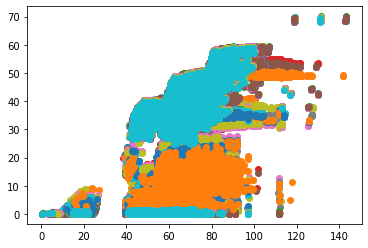

In [4]:
#plt.plot(dmatrix[0], atomic_matrix[0], 'o')
for i in range(50):
    plt.plot(dmatrix[i][i+1:], atomic_matrix[i][i+1:], 'o')

In [ ]:
dmatrix[i][i+1:]

In [5]:
ind = np.triu_indices(len(dmatrix), k=1)

In [6]:
#hist_alchpot = np.histogram2d(dmatrix[ind], alchpot_matrix[ind], bins=50)
hist_atomic = np.histogram2d(dmatrix[ind], atomic_matrix[ind], bins=50)
#hist_atomisation = np.histogram2d(dmatrix[ind], atomisation_matrix[ind], bins=50)

In [15]:
from matplotlib.image import NonUniformImage

import matplotlib.pyplot as plt

In [ ]:
ax = fig.add_subplot(133, title='NonUniformImage: interpolated',

        aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])

im = NonUniformImage(ax, interpolation='bilinear')

xcenters = (xedges[:-1] + xedges[1:]) / 2

ycenters = (yedges[:-1] + yedges[1:]) / 2

im.set_data(xcenters, ycenters, H)

ax.images.append(im)

plt.show()


In [11]:
hist_atomic[0]

array([[2.6560e+03, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4483e+04, 2.0000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.2920e+03, 3.5100e+02, 2.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 7.6900e+02,
        4.8000e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.4000e+02,
        1.5600e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 4.8000e+01,
        7.8000e+01]])

In [13]:
hist_atomic[1]

array([1.22863055e-05, 3.10714018e+00, 6.21426807e+00, 9.32139596e+00,
       1.24285239e+01, 1.55356517e+01, 1.86427796e+01, 2.17499075e+01,
       2.48570354e+01, 2.79641633e+01, 3.10712912e+01, 3.41784191e+01,
       3.72855470e+01, 4.03926749e+01, 4.34998028e+01, 4.66069307e+01,
       4.97140586e+01, 5.28211864e+01, 5.59283143e+01, 5.90354422e+01,
       6.21425701e+01, 6.52496980e+01, 6.83568259e+01, 7.14639538e+01,
       7.45710817e+01, 7.76782096e+01, 8.07853375e+01, 8.38924654e+01,
       8.69995932e+01, 9.01067211e+01, 9.32138490e+01, 9.63209769e+01,
       9.94281048e+01, 1.02535233e+02, 1.05642361e+02, 1.08749488e+02,
       1.11856616e+02, 1.14963744e+02, 1.18070872e+02, 1.21178000e+02,
       1.24285128e+02, 1.27392256e+02, 1.30499384e+02, 1.33606512e+02,
       1.36713640e+02, 1.39820767e+02, 1.42927895e+02, 1.46035023e+02,
       1.49142151e+02, 1.52249279e+02, 1.55356407e+02])

In [14]:
hist_atomic[2]

array([5.12616083e-09, 1.41982930e+00, 2.83965860e+00, 4.25948790e+00,
       5.67931719e+00, 7.09914649e+00, 8.51897579e+00, 9.93880509e+00,
       1.13586344e+01, 1.27784637e+01, 1.41982930e+01, 1.56181223e+01,
       1.70379516e+01, 1.84577809e+01, 1.98776102e+01, 2.12974395e+01,
       2.27172688e+01, 2.41370981e+01, 2.55569274e+01, 2.69767567e+01,
       2.83965860e+01, 2.98164153e+01, 3.12362445e+01, 3.26560738e+01,
       3.40759031e+01, 3.54957324e+01, 3.69155617e+01, 3.83353910e+01,
       3.97552203e+01, 4.11750496e+01, 4.25948789e+01, 4.40147082e+01,
       4.54345375e+01, 4.68543668e+01, 4.82741961e+01, 4.96940254e+01,
       5.11138547e+01, 5.25336840e+01, 5.39535133e+01, 5.53733426e+01,
       5.67931719e+01, 5.82130012e+01, 5.96328305e+01, 6.10526598e+01,
       6.24724891e+01, 6.38923184e+01, 6.53121477e+01, 6.67319770e+01,
       6.81518063e+01, 6.95716356e+01, 7.09914649e+01])

In [ ]:
fig, ax = plt.subplots(1,1)

ax.contour(hist_atomic[1][:-1], hist_atomic[2][:-1], hist_atomic[0].T)
ax.set_ylim(0,10)

In [ ]:
hist_atomic[1][:-1]

In [ ]:
fig, ax = plt.subplots(1,1)

ax.contourf(hist_atomisation[1][:-1], hist_atomisation[2][:-1], hist_atomisation[0])

In [ ]:
# data preparation
data, molecule_size = qmi.load_alchemy_data(qmi.wrapper_alch_data())
all_local_reps = qmi.generate_atomic_representations(data, molecule_size)
# split up alchemical potential by element
charges = qmi.generate_label_vector(data, molecule_size.sum(), value='charge')
idc_by_charge = qmi.partition_idx_by_charge(charges)

#atomisation_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomisation')
atomic_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomic')
alch_pots = qmi.generate_label_vector(data, molecule_size.sum(), value='alch_pot')

el_reps =dict()
el_alch_pots = dict()
el_atomic_en = dict()

for k in idc_by_charge.keys():
    el_reps[k] = all_local_reps[idc_by_charge[k]]
    el_alch_pots[k] = alch_pots[idc_by_charge[k]]
    el_atomic_en[k] = atomic_en[idc_by_charge[k]]

In [ ]:
dmatrices = dict()
for Z in el_reps.keys():
    dmatrices[Z] = get_dmatrix(el_reps[Z])

In [ ]:
alch_matrices = dict()
for Z in el_reps.keys():
    alch_matrices[Z] = get_property_matrix(el_alch_pots[Z])

In [ ]:
atomic_matrices = dict()
for Z in el_reps.keys():
    atomic_matrices[Z] = get_property_matrix(el_atomic_en[Z])

In [ ]:
ind = dict()
for Z in dmatrices.keys():
    ind[Z] = np.triu_indices(len(dmatrices[Z]), k=1)

In [ ]:
Z=1.0
hist = np.histogram2d(dmatrices[Z][ind[Z]], alch_matrices[Z][ind[Z]], bins=100)

In [ ]:
hist[0].shape

In [ ]:
plt.contour(hist[1][:-1], hist[2][:-1], hist[0])

In [ ]:
hist[2]

### Learning curve atomic energy of H only

In [ ]:
import numpy as np
import qml
import sys
sys.path.insert(0, '/home/misa/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
import scipy as sc
import sklearn.model_selection as sk

from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 20
from matplotlib import cm as cmx
import matplotlib.colors as colors

In [ ]:
def crossvalidate(reps, labels, tr_size, sigma, lam, num_cv):
    errors = []
    for cv in range(num_cv):
        reps_tr, reps_test, labels_tr, labels_test = sk.train_test_split(reps,labels,train_size=tr_size)
        coeffs = qmi.train_kernel(reps_tr, labels_tr, sigma, lam_val)
        labels_predicted = qmi.predict_labels(reps_test, reps_tr, sigma, coeffs)
        errors.append((np.abs(labels_predicted - labels_test)).mean())
    errors = np.array(errors)
    return(errors.mean(), errors.std())

In [ ]:
# data preparation
data, molecule_size = qmi.load_alchemy_data(qmi.wrapper_alch_data())

atomic_en = qmi.generate_label_vector(data, molecule_size.sum(), value='atomic')
charges = qmi.generate_label_vector(data, molecule_size.sum(), value='charge')
idc_by_charge = qmi.partition_idx_by_charge(charges)
mean_atomic_h = qmi.get_average_property(idc_by_charge[1][0], data, molecule_size, 'atomic')[1]

molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
mean_atomisation_mol = molecule_atomisation.mean()

In [ ]:
all_local_reps = qmi.generate_atomic_representations(data, molecule_size)
h_local_reps = all_local_reps[idc_by_charge[1]]
h_local_labels = atomic_en[idc_by_charge[1]]

In [ ]:
sigmas = np.logspace(-1, 10, 11, base=2)
lam_val = 1e-5
num_cv = 3

lcurves = dict()

# define number of training points for which MAE is calculated
set_sizes = np.logspace(0, 11, 12, base=2).astype(int)

for sigma in sigmas:
    error_cv = []
    error_std = []
    # calculate error for every training point size
    for idx, tr_size in enumerate(set_sizes):
        err, err_std = crossvalidate(h_local_reps, h_local_labels, tr_size, sigma, lam_val, num_cv)
        error_cv.append(err)
        error_std.append(err_std)
    
    lcurves[f'sig_{sigma}'] = np.array([set_sizes, error_cv, error_std]).T

In [ ]:
lcurves

In [ ]:
NUM_COLORS = len(lcurves.keys())
# cm_jet = plt.get_cmap('jet')
# cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
# scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm_jet)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [6.0, 4.0]
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
for k in lcurves.keys():
    ax.plot(lcurves[k][:,0], lcurves[k][:,1], '-o', label=r'$\sigma = {}$'.format(np.round( float(k.split('_')[1]), 2 )) )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(lcurves['sig_222.8609442038079'][:,0],lcurves['sig_222.8609442038079'][:,1], '-o', label=r'$\sigma = 222$')
ax.plot(lcurves['sig_103.96830673359823'][:,0],lcurves['sig_103.96830673359823'][:,1], '-o', label=r'$\sigma = 104$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Minimum error for training set size of 2048 atoms = 0.012 Ha = 8 kcal/mol

Error in atomisation energy for QM7 molecules with 5000 training points = 5 kcal/mol and 8.5 kcal/mol for 2048 training points (and 5000 test points)

The errors are similar (check distribution of QM7 molecules to make sure they are also comparable)
suggests, that noise in data is not an issue but spread (shift and rescale)

compare to learning curve of 38Ve molecules

### Alchemical potentials vs atomisation energy molecule

In [ ]:
molecule_atomisation = qmi.generate_label_vector(data, len(molecule_size), 'atomisation_global')
kde_molecule = sc.stats.gaussian_kde(molecule_atomisation)
x_molecule = np.linspace(np.amin(molecule_atomisation)-1, np.amax(molecule_atomisation)+1, 500)

In [ ]:
mean_atomisation_mol = molecule_atomisation.mean()

mean_alch_h = qmi.get_average_property(idc_by_charge[1][0], data, molecule_size, 'alch_pot')[1]
mean_alch_c = qmi.get_average_property(idc_by_charge[6][0], data, molecule_size, 'alch_pot')[6]
mean_alch_n = qmi.get_average_property(idc_by_charge[7][0], data, molecule_size, 'alch_pot')[7]
mean_alch_o = qmi.get_average_property(idc_by_charge[8][0], data, molecule_size, 'alch_pot')[8]

delta_values = np.zeros((len(alch_pot)))
delta_values[idc_by_charge[1]] = mean_alch_h
delta_values[idc_by_charge[6]] = mean_alch_c
delta_values[idc_by_charge[7]] = mean_alch_n
delta_values[idc_by_charge[8]] = mean_alch_o

labels_shifted = alch_pot - delta_values

In [ ]:
x_molecule_shifted = (x_molecule - mean_atomisation_mol)
kde_molecule_shifted = sc.stats.gaussian_kde(molecule_atomisation - mean_atomisation_mol)
x_alch_shifted_all = np.linspace(np.amin(labels_shifted)-0.5, np.amax(labels_shifted)+0.5, 500 )
kde_alch_shifted = sc.stats.gaussian_kde(labels_shifted)

x_alch_shifted = dict()
x_alch_shifted[1] = (x_alch[1] - mean_alch_h)
x_alch_shifted[6] = (x_alch[6] - mean_alch_c)
x_alch_shifted[7] = (x_alch[7] - mean_alch_n)
x_alch_shifted[8] = (x_alch[8] - mean_alch_o)

kde_h_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[1]] - mean_alch_h)
kde_c_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[6]] - mean_alch_c)
kde_n_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[7]] - mean_alch_n)
kde_o_shifted = sc.stats.gaussian_kde(alch_pot[idc_by_charge[8]] - mean_alch_o)

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), label = r'$E_{\rm{at}^{\rm{mol}}}$')
ax.plot(x_alch_shifted_all, kde_alch_shifted.evaluate(x_alch_shifted_all), label=r'$\mu$')
ax.legend()

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(x_molecule_shifted, kde_molecule_shifted.evaluate(x_molecule_shifted), label = r'$E_{\rm{at}^{\rm{mol}}}$')
ax.plot(x_alch_shifted_all, kde_alch_shifted.evaluate(x_alch_shifted_all), label=r'$\mu$')
ax.plot(x_alch_shifted[1], kde_h_shifted.evaluate(x_alch_shifted[1]), '--', label=r'$\mu_H$')
ax.plot(x_alch_shifted[6], kde_c_shifted.evaluate(x_alch_shifted[6]), '--',label=r'$\mu_C$')
ax.plot(x_alch_shifted[7], kde_n_shifted.evaluate(x_alch_shifted[7]), '--',label=r'$\mu_N$')
ax.plot(x_alch_shifted[8], kde_o_shifted.evaluate(x_alch_shifted[8]), '--',label=r'$\mu_O$')
# ax.set_xlim(-1.5, 1.5)
ax.legend()


In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x_alch_shifted[1], kde_h_shifted.evaluate(x_alch_shifted[1]), label=r'$\mu_H$')
ax.plot(x_alch_shifted[6], kde_c_shifted.evaluate(x_alch_shifted[6]), label=r'$\mu_C$')
ax.plot(x_alch_shifted[7], kde_n_shifted.evaluate(x_alch_shifted[7]), label=r'$\mu_N$')
ax.plot(x_alch_shifted[8], kde_o_shifted.evaluate(x_alch_shifted[8]), label=r'$\mu_O$')
ax.legend()

### Learning Alch pot

In [ ]:
all_local_reps = qmi.generate_atomic_representations(data, molecule_size)
all_labels = labels_shifted

In [ ]:
sigmas = np.logspace(-1, 10, 11, base=2)
lam_val = 1e-5
num_cv = 3

lcurves = dict()

# define number of training points for which MAE is calculated
set_sizes = np.logspace(0, 11, 12, base=2).astype(int)

for sigma in sigmas:
    error_cv = []
    error_std = []
    # calculate error for every training point size
    for idx, tr_size in enumerate(set_sizes):
        err, err_std = crossvalidate(all_local_reps, all_labels, tr_size, sigma, lam_val, num_cv)
        error_cv.append(err)
        error_std.append(err_std)
    
    lcurves[f'sig_{sigma}'] = np.array([set_sizes, error_cv, error_std]).T

In [ ]:
NUM_COLORS = len(lcurves.keys())
# cm_jet = plt.get_cmap('jet')
# cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
# scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm_jet)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [ ]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [6.0, 4.0]
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
for k in lcurves.keys():
    ax.plot(lcurves[k][:,0], lcurves[k][:,1], '-o', label=r'$\sigma = {}$'.format(np.round( float(k.split('_')[1]), 2 )) )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- the error is higher than for atomic energies (check for bugs, overwritten variables...)

$\rightarrow$ rescaling and shifting is probably not the issue

the surface is non smooth, rescaling does not help makes it even more non smooth

$\rightarrow$ change of representation could help

- also learning only H is easier (maybe smoother)
$\rightarrow$ learn all elements individually

what is the optimal representation? 
$\rightarrow$  investigate label distribution, distance distribution (for all together/single element)

deep neural networks are supposed to work better for non smooth systems

In [ ]:
lcurves['sig_48.50293012833276']